In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/spam.csv", encoding='ISO-8859-1')


In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df["label"] = df['v1']

In [5]:
df["message"] = df['v2']

In [6]:
df = df[["label", "message"]]

In [7]:
df['length'] = df['message'].str.len()


In [8]:
# define a regular expression pattern that matches all punctuation characters
punct_pattern = r'[^\w\s]'

# count the punctuation in the 'text' column using the str.count() method
df['punct'] = df['message'].str.count(punct_pattern)

In [9]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [10]:
len(df)

5572

In [11]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [12]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [13]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

### Visualization

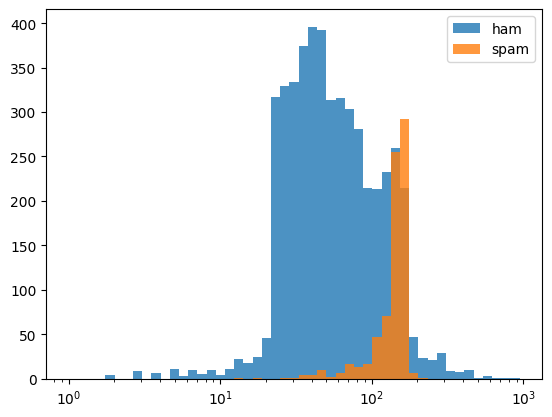

In [14]:
plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'], bins=bins, alpha=0.8)
plt.hist(df[df['label']=='spam']['length'], bins=bins, alpha=0.8)
plt.legend(('ham', 'spam'))
plt.show()

In [15]:
df['punct'].describe()

count    5572.000000
mean        4.259871
std         4.676152
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max       133.000000
Name: punct, dtype: float64

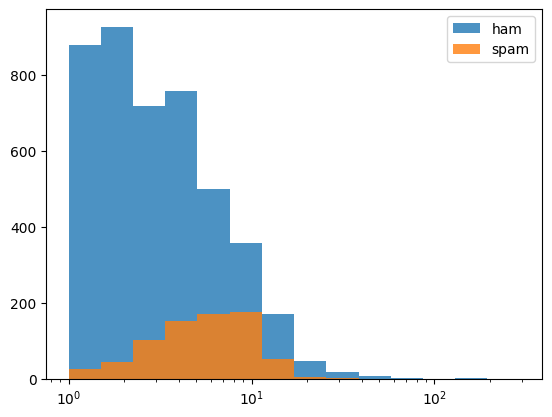

In [16]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'], bins=bins, alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'], bins=bins, alpha=0.8)
plt.legend(('ham', 'spam'))
plt.show()

In [17]:
# Create feature and label
x = df[['length', 'punct']]
y = df['label']

In [18]:
x

,length,punct
0,111,9
1,29,6
2,155,6
3,49,6
4,61,2
...,...,...
5567,161,9
5568,37,1
5569,57,7
5570,125,1


In [19]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=42)

print('Training Date Shape:', x_train.shape)
print('Testing Date Shape:', x_test.shape)

Training Date Shape: (3900, 2)
Testing Date Shape: (1672, 2)


In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [23]:
predictions = knn_model.predict(x_test)

In [24]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predictions))

[[1362   91]
 [  97  122]]


In [25]:
# Print Classification Report
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.93      0.94      0.94      1453
        spam       0.57      0.56      0.56       219

    accuracy                           0.89      1672
   macro avg       0.75      0.75      0.75      1672
weighted avg       0.89      0.89      0.89      1672



In [26]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test, predictions))

0.8875598086124402


### Text Classification using NL

In [27]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [28]:
X = df['message']
Y = df['label']

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30, random_state=42)


In [30]:
X_train.shape

(3900,)

In [31]:
X_test.shape

(1672,)

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

In [33]:
X_train_counts.shape

(3900, 7206)

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer =  TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [35]:
X_train_tfidf.shape

(3900, 7206)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)

In [37]:
X_train_vect.shape

(3900, 7206)

In [38]:
# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                    ('clf', KNeighborsClassifier(n_neighbors=5)),])
text_clf.fit(X_train, Y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', KNeighborsClassifier())])

In [39]:
new_predictions = text_clf.predict(X_test)

In [40]:
from sklearn import metrics
print(metrics.confusion_matrix(Y_test, new_predictions))

[[1453    0]
 [ 147   72]]


In [41]:
# Print Classification Report
print(metrics.classification_report(Y_test, new_predictions))

              precision    recall  f1-score   support

         ham       0.91      1.00      0.95      1453
        spam       1.00      0.33      0.49       219

    accuracy                           0.91      1672
   macro avg       0.95      0.66      0.72      1672
weighted avg       0.92      0.91      0.89      1672



In [42]:
# Print the overall accuracy
print(metrics.accuracy_score(Y_test, new_predictions))

0.9120813397129187
